In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('flights_sample_3m.csv')
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

FL_DATE                     object
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE           object
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64
DELAY_DUE_CARRIER          float64
DELAY_DUE_WEATHER   

In [4]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d')

In [5]:
df.FL_DATE.dtype

dtype('<M8[ns]')

In [6]:
summer_months = [6, 7, 8]
df_22_23_data = df[(df['FL_DATE'].dt.year.isin([2022, 2023])) &
                   (df['FL_DATE'].dt.month.isin(summer_months))]

df_cancelled = df_22_23_data.loc[df_22_23_data['CANCELLED'] == 1].reset_index().drop(columns='index')
df_cancelled

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2022-06-09,JetBlue Airways,JetBlue Airways: B6,B6,20409,1319,BOS,"Boston, MA",MIA,"Miami, FL",1408,NaN,NaN,NaN,NaN,NaN,NaN,1737,NaN,NaN,1.0,A,0.0,209.0,NaN,NaN,1258.0,NaN,NaN,NaN,NaN,NaN
1,2022-06-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1143,SEA,"Seattle, WA",ANC,"Anchorage, AK",731,NaN,NaN,NaN,NaN,NaN,NaN,1007,NaN,NaN,1.0,A,0.0,216.0,NaN,NaN,1448.0,NaN,NaN,NaN,NaN,NaN
2,2023-07-27,Republic Airline,Republic Airline: YX,YX,20452,3526,MYR,"Myrtle Beach, SC",EWR,"Newark, NJ",1850,NaN,NaN,NaN,NaN,NaN,NaN,2059,NaN,NaN,1.0,B,0.0,129.0,NaN,NaN,550.0,NaN,NaN,NaN,NaN,NaN
3,2022-07-03,PSA Airlines Inc.,PSA Airlines Inc.: OH,OH,20397,5088,ORF,"Norfolk, VA",PHL,"Philadelphia, PA",825,NaN,NaN,NaN,NaN,NaN,NaN,931,NaN,NaN,1.0,B,0.0,66.0,NaN,NaN,212.0,NaN,NaN,NaN,NaN,NaN
4,2023-08-07,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1741,STL,"St. Louis, MO",EWR,"Newark, NJ",1733,NaN,NaN,NaN,NaN,NaN,NaN,2100,NaN,NaN,1.0,B,0.0,147.0,NaN,NaN,872.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,2023-07-27,Endeavor Air Inc.,Endeavor Air Inc.: 9E,9E,20363,4969,RDU,"Raleigh/Durham, NC",LGA,"New York, NY",1755,NaN,NaN,NaN,NaN,NaN,NaN,1945,NaN,NaN,1.0,C,0.0,110.0,NaN,NaN,431.0,NaN,NaN,NaN,NaN,NaN
7913,2023-07-31,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,753,PHL,"Philadelphia, PA",MCO,"Orlando, FL",1932,NaN,NaN,NaN,NaN,NaN,NaN,2217,NaN,NaN,1.0,C,0.0,165.0,NaN,NaN,861.0,NaN,NaN,NaN,NaN,NaN
7914,2022-08-08,Republic Airline,Republic Airline: YX,YX,20452,4739,ILM,"Wilmington, NC",ORD,"Chicago, IL",1246,NaN,NaN,NaN,NaN,NaN,NaN,1414,NaN,NaN,1.0,B,0.0,148.0,NaN,NaN,760.0,NaN,NaN,NaN,NaN,NaN
7915,2022-08-30,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,528,DCA,"Washington, DC",BNA,"Nashville, TN",1535,NaN,NaN,NaN,NaN,NaN,NaN,1625,NaN,NaN,1.0,B,0.0,110.0,NaN,NaN,562.0,NaN,NaN,NaN,NaN,NaN


In [7]:
df_cancelled.value_counts(['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS','DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT',
                           'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF','WHEELS_ON', 'TAXI_IN','DIVERTED'])

Series([], Name: count, dtype: int64)

In [8]:
df_cancelled = df_cancelled.drop(columns=['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'AIR_TIME',
                                          'ELAPSED_TIME', 'DIVERTED', 'ARR_TIME', 'ARR_DELAY', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
                                          'ORIGIN', 'DEST', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE','CANCELLED'])

In [9]:
df_cancelled['Year'] = df_cancelled['FL_DATE'].dt.year
df_cancelled['Month'] = df_cancelled['FL_DATE'].dt.month
df_cancelled.head()

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLATION_CODE,CRS_ELAPSED_TIME,DISTANCE,Year,Month
0,2022-06-09,JetBlue Airways,1319,"Boston, MA","Miami, FL",1408,1737,A,209.0,1258.0,2022,6
1,2022-06-19,Delta Air Lines Inc.,1143,"Seattle, WA","Anchorage, AK",731,1007,A,216.0,1448.0,2022,6
2,2023-07-27,Republic Airline,3526,"Myrtle Beach, SC","Newark, NJ",1850,2059,B,129.0,550.0,2023,7
3,2022-07-03,PSA Airlines Inc.,5088,"Norfolk, VA","Philadelphia, PA",825,931,B,66.0,212.0,2022,7
4,2023-08-07,United Air Lines Inc.,1741,"St. Louis, MO","Newark, NJ",1733,2100,B,147.0,872.0,2023,8


In [10]:
df_cancelled['ORIGIN_STATE'] = df_cancelled['ORIGIN_CITY'].str.split(', ').str[-1]
df_cancelled['DEST_STATE'] = df_cancelled['DEST_CITY'].str.split(', ').str[-1]
df_cancelled.head()

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLATION_CODE,CRS_ELAPSED_TIME,DISTANCE,Year,Month,ORIGIN_STATE,DEST_STATE
0,2022-06-09,JetBlue Airways,1319,"Boston, MA","Miami, FL",1408,1737,A,209.0,1258.0,2022,6,MA,FL
1,2022-06-19,Delta Air Lines Inc.,1143,"Seattle, WA","Anchorage, AK",731,1007,A,216.0,1448.0,2022,6,WA,AK
2,2023-07-27,Republic Airline,3526,"Myrtle Beach, SC","Newark, NJ",1850,2059,B,129.0,550.0,2023,7,SC,NJ
3,2022-07-03,PSA Airlines Inc.,5088,"Norfolk, VA","Philadelphia, PA",825,931,B,66.0,212.0,2022,7,VA,PA
4,2023-08-07,United Air Lines Inc.,1741,"St. Louis, MO","Newark, NJ",1733,2100,B,147.0,872.0,2023,8,MO,NJ


In [11]:
df_cancelled['CANCELLATION_CODE'].value_counts()

CANCELLATION_CODE
B    3646
A    2781
C    1483
D       7
Name: count, dtype: int64

In [12]:
cancellation_codes = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}

df_cancelled['CANCELLATION_CODE'] = df_cancelled['CANCELLATION_CODE'].map(
    cancellation_codes)

In [13]:
df_cancelled.shape

(7917, 14)

In [14]:
df_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FL_DATE            7917 non-null   datetime64[ns]
 1   AIRLINE            7917 non-null   object        
 2   FL_NUMBER          7917 non-null   int64         
 3   ORIGIN_CITY        7917 non-null   object        
 4   DEST_CITY          7917 non-null   object        
 5   CRS_DEP_TIME       7917 non-null   int64         
 6   CRS_ARR_TIME       7917 non-null   int64         
 7   CANCELLATION_CODE  7917 non-null   object        
 8   CRS_ELAPSED_TIME   7917 non-null   float64       
 9   DISTANCE           7917 non-null   float64       
 10  Year               7917 non-null   int32         
 11  Month              7917 non-null   int32         
 12  ORIGIN_STATE       7917 non-null   object        
 13  DEST_STATE         7917 non-null   object        
dtypes: datet

In [15]:
df_cancelled.nunique().sort_values()

Year                    2
Month                   3
CANCELLATION_CODE       4
AIRLINE                17
ORIGIN_STATE           52
DEST_STATE             52
FL_DATE               184
DEST_CITY             244
ORIGIN_CITY           245
CRS_ELAPSED_TIME      346
CRS_DEP_TIME         1047
DISTANCE             1082
CRS_ARR_TIME         1159
FL_NUMBER            3784
dtype: int64

In [16]:
df_cancelled.describe()

,FL_DATE,FL_NUMBER,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,Year,Month
count,7917,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000
mean,2022-12-28 08:40:44.562334208,2627.673109,1477.508779,1597.274978,141.160667,773.998105,2022.457118,6.915119
min,2022-06-01 00:00:00,2.000000,9.000000,1.000000,35.000000,61.000000,2022.000000,6.000000
25%,2022-07-06 00:00:00,1219.000000,1035.000000,1141.000000,93.000000,372.000000,2022.000000,6.000000
50%,2022-08-22 00:00:00,2266.000000,1600.000000,1734.000000,126.000000,640.000000,2022.000000,7.000000
75%,2023-07-10 00:00:00,4077.000000,1910.000000,2054.000000,170.000000,1010.000000,2023.000000,8.000000
max,2023-08-31 00:00:00,6510.000000,2359.000000,2359.000000,625.000000,4817.000000,2023.000000,8.000000
std,NaN,1712.777389,515.625729,573.401165,65.490779,547.446752,0.498189,0.820019


In [17]:
df_cancelled['CRS_DEP_TIME'].sort_values()

1222       9
3032      20
974       32
7008      35
1402      35
        ... 
1074    2359
3449    2359
1022    2359
6666    2359
7083    2359
Name: CRS_DEP_TIME, Length: 7917, dtype: int64

In [18]:
df_cancelled.loc[(df_cancelled['CRS_DEP_TIME'] <= 10)]

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLATION_CODE,CRS_ELAPSED_TIME,DISTANCE,Year,Month,ORIGIN_STATE,DEST_STATE
1222,2023-06-10,Frontier Airlines Inc.,1102,"Las Vegas, NV","Orlando, FL",9,741,Carrier,272.0,2039.0,2023,6,NV,FL


In [19]:
# Orlando is 3 hours ahead of Las Vegas - GMT-4
# Las Vegas - GMT-7

# Airplane's planned departure from Las Vegas, NV: 00:09 - local time
# Airplane's planned arrival to Orlando, FL: 07:41 - local time

# 3 hour time difference -> time in air should have been 07:41-03:00-00:09 = 04:32
# CRS_ELAPSED_TIME: 272 minutes = 4 hours 32 minutes

In [20]:
df_cancelled['FL_NUMBER'].value_counts()

FL_NUMBER
1210    10
747      9
472      9
5032     9
1891     8
        ..
681      1
3113     1
1657     1
3518     1
1916     1
Name: count, Length: 3784, dtype: int64

In [21]:
df_cancelled['FL_NUMBER'].value_counts().loc[lambda x: x > 5]

FL_NUMBER
1210    10
747      9
472      9
5032     9
1891     8
        ..
538      6
1698     6
332      6
315      6
2134     6
Name: count, Length: 97, dtype: int64

In [22]:
df_cancelled['DEST_CITY'].value_counts()

DEST_CITY
New York, NY                 895
Newark, NJ                   488
Chicago, IL                  440
Washington, DC               352
Denver, CO                   307
                            ... 
College Station/Bryan, TX      1
Killeen, TX                    1
Bethel, AK                     1
Flagstaff, AZ                  1
Staunton, VA                   1
Name: count, Length: 244, dtype: int64

In [23]:
cancellation_trend = df_cancelled.groupby(
    df_cancelled['FL_DATE'].dt.to_period('M')).size()
cancellation_trend

FL_DATE
2022-06    1809
2022-07    1043
2022-08    1446
2023-06    1217
2023-07    1494
2023-08     908
Freq: M, dtype: int64

In [24]:
cancellation_trend.index = cancellation_trend.index.to_timestamp()
cancellation_counts = df_cancelled.groupby(
    ['Year', 'Month']).size().unstack(level=0)
cancellation_counts

Year,2022,2023
Month,,
6,1809,1217
7,1043,1494
8,1446,908


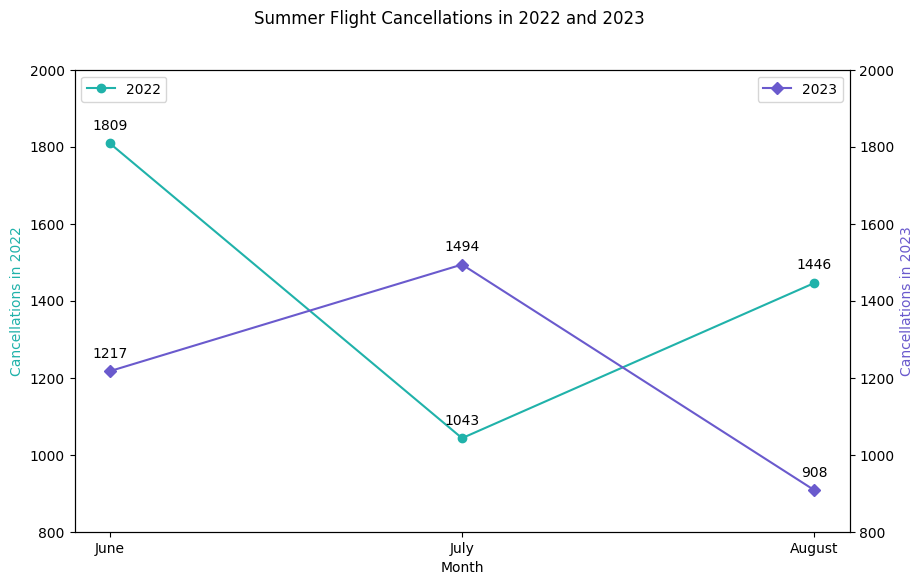

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Month')
ax1.set_ylabel('Cancellations in 2022', color='lightseagreen')
ax1.plot(cancellation_counts.index,
         cancellation_counts[2022],
         color='lightseagreen',
         marker='o',
         label='2022')
ax1.set_xticks([6, 7, 8])
ax1.set_xticklabels(['June', 'July', 'August'])

for i, txt in enumerate(cancellation_counts[2022]):
    ax1.annotate(f'{txt}', (cancellation_counts.index[i], cancellation_counts[2022].iloc[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center')

a, b = 800, 2000
ax1.set_ylim(a, b)
ax2 = ax1.twinx()
ax2.set_ylim(a, b)

ax2.set_ylabel('Cancellations in 2023', color='slateblue')
ax2.plot(cancellation_counts.index,
         cancellation_counts[2023],
         color='slateblue',
         marker='D',
         label='2023')

for i, txt in enumerate(cancellation_counts[2023]):
    ax2.annotate(f'{txt}', (cancellation_counts.index[i], cancellation_counts[2023].iloc[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center')

fig.suptitle('Summer Flight Cancellations in 2022 and 2023')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [26]:
cancellations_per_code = df_cancelled['CANCELLATION_CODE'].value_counts()
cancellations_per_code

CANCELLATION_CODE
Weather                3646
Carrier                2781
National Air System    1483
Security                  7
Name: count, dtype: int64

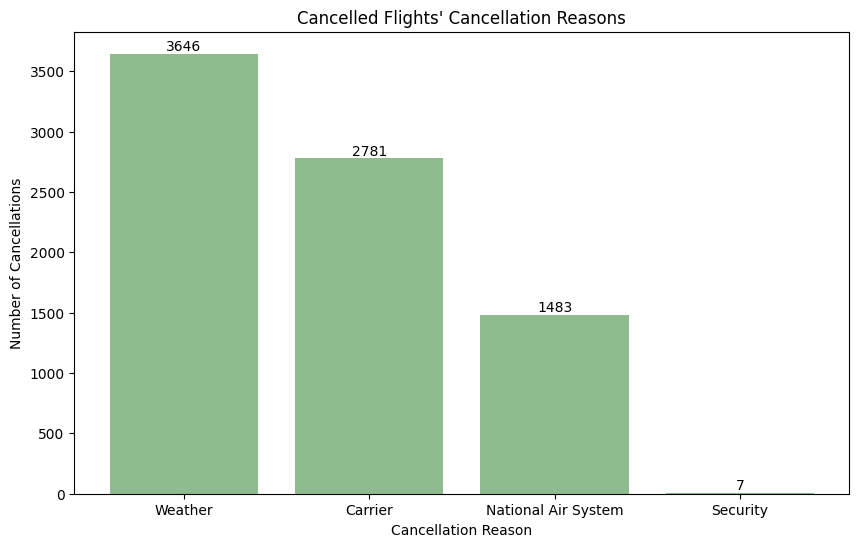

In [27]:
plt.figure(figsize=(10, 6))

canc_code_barplot = plt.bar(cancellations_per_code.index,
                            cancellations_per_code.values,
                            color='darkseagreen')

plt.title("Cancelled Flights' Cancellation Reasons")
plt.xlabel('Cancellation Reason')
plt.ylabel('Number of Cancellations')

for bar in canc_code_barplot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}', ha='center', va='bottom')

plt.show()

In [28]:
cancellation_reasons_by_date = df_cancelled.groupby(
    ['Year', 'Month', 'CANCELLATION_CODE']).size().unstack(fill_value=0)
cancellation_reasons_by_date

CANCELLATION_CODE  Carrier  National Air System  Security  Weather
Year Month                                                        
2022 6                 832                  316         1      660
     7                 429                  184         3      427
     8                 387                  253         3      803
2023 6                 470                  243         0      504
     7                 400                  402         0      692
     8                 263                   85         0      560

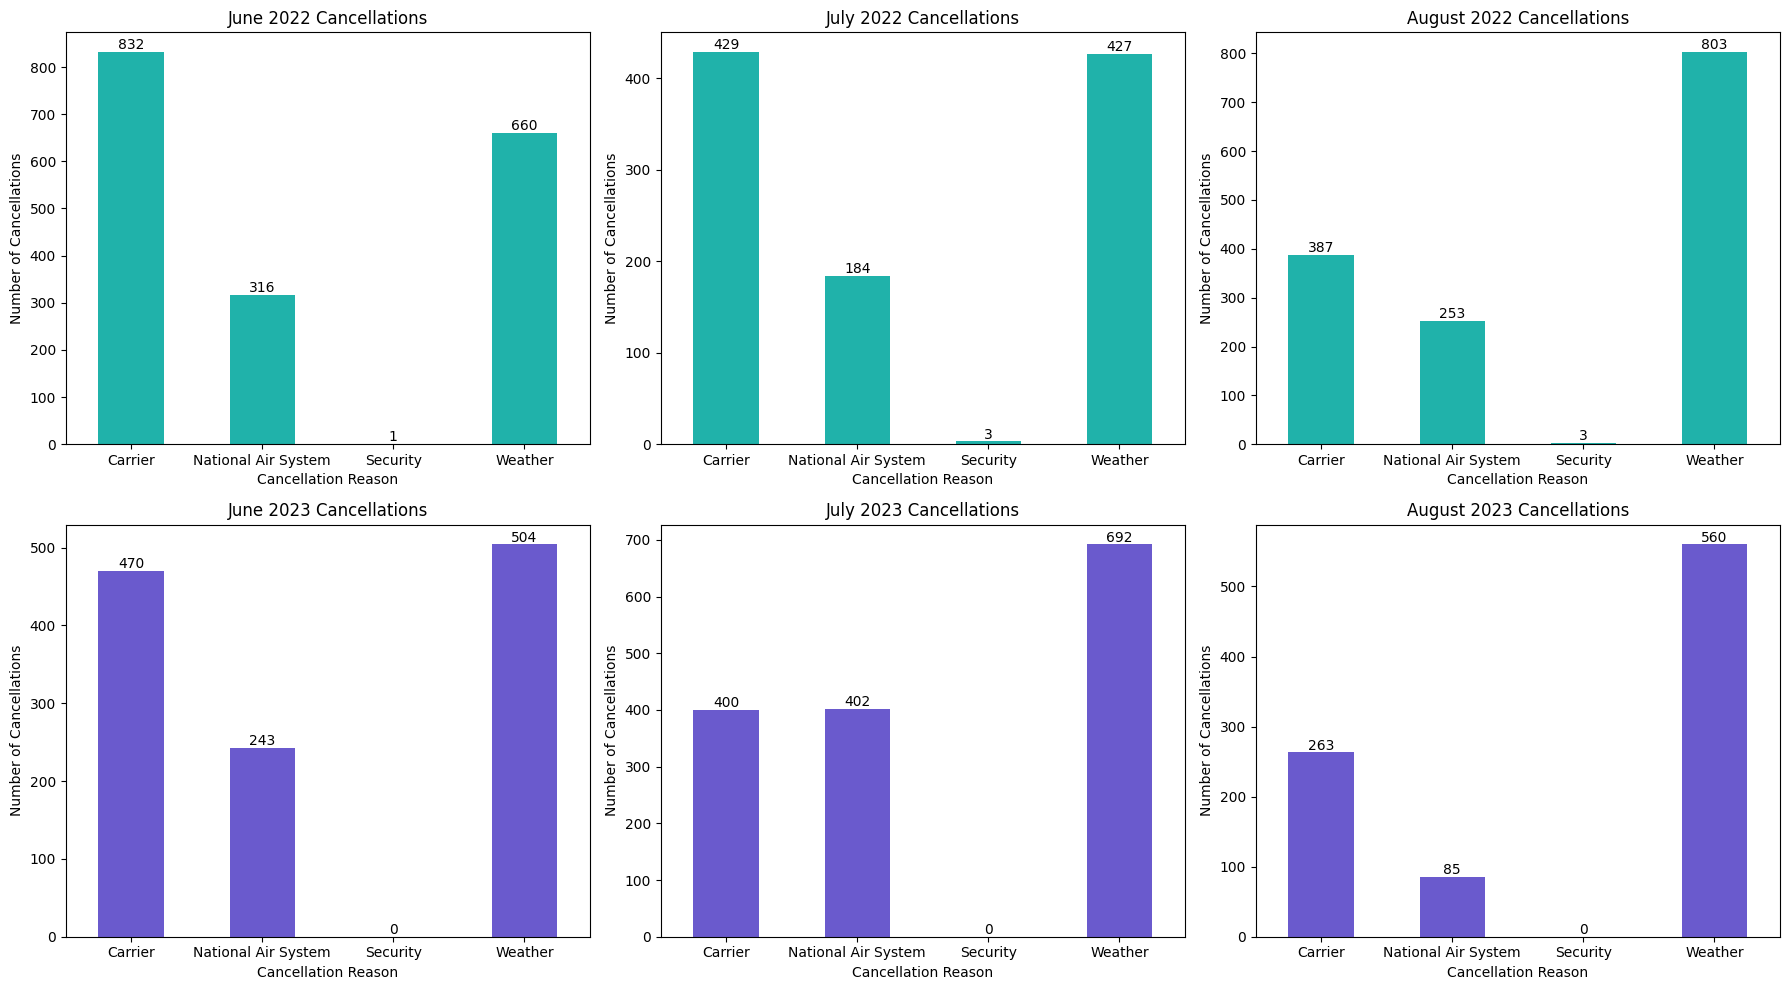

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

plot1 = cancellation_reasons_by_date.loc[(2022, 6)].plot(
    kind='bar', ax=axs[0, 0], title='June 2022 Cancellations', color='lightseagreen')
plot2 = cancellation_reasons_by_date.loc[(2022, 7)].plot(
    kind='bar', ax=axs[0, 1], title='July 2022 Cancellations', color='lightseagreen')
plot3 = cancellation_reasons_by_date.loc[(2022, 8)].plot(
    kind='bar', ax=axs[0, 2], title='August 2022 Cancellations', color='lightseagreen')

plot4 = cancellation_reasons_by_date.loc[(2023, 6)].plot(
    kind='bar', ax=axs[1, 0], title='June 2023 Cancellations', color='slateblue')
plot5 = cancellation_reasons_by_date.loc[(2023, 7)].plot(
    kind='bar', ax=axs[1, 1], title='July 2023 Cancellations', color='slateblue')
plot6 = cancellation_reasons_by_date.loc[(2023, 8)].plot(
    kind='bar', ax=axs[1, 2], title='August 2023 Cancellations', color='slateblue')

for ax in axs.flat:
    ax.set_xlabel('Cancellation Reason')
    ax.set_ylabel('Number of Cancellations')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

def annotate_bars(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

annotate_bars(plot1)
annotate_bars(plot2)
annotate_bars(plot3)
annotate_bars(plot4)
annotate_bars(plot5)
annotate_bars(plot6)

plt.tight_layout()
plt.show()

In [30]:
airline_cancellations = df_cancelled.groupby(
    ['AIRLINE', 'CANCELLATION_CODE']).size().unstack(fill_value=0)
airline_cancellations

CANCELLATION_CODE,Carrier,National Air System,Security,Weather
AIRLINE,,,,
Alaska Airlines Inc.,40,2,0,20
Allegiant Air,36,18,1,22
American Airlines Inc.,514,56,0,825
Delta Air Lines Inc.,573,115,0,190
Endeavor Air Inc.,138,390,0,81
Envoy Air,11,52,0,46
Frontier Airlines Inc.,152,0,0,84
Hawaiian Airlines Inc.,28,0,0,2
Horizon Air,7,0,0,0


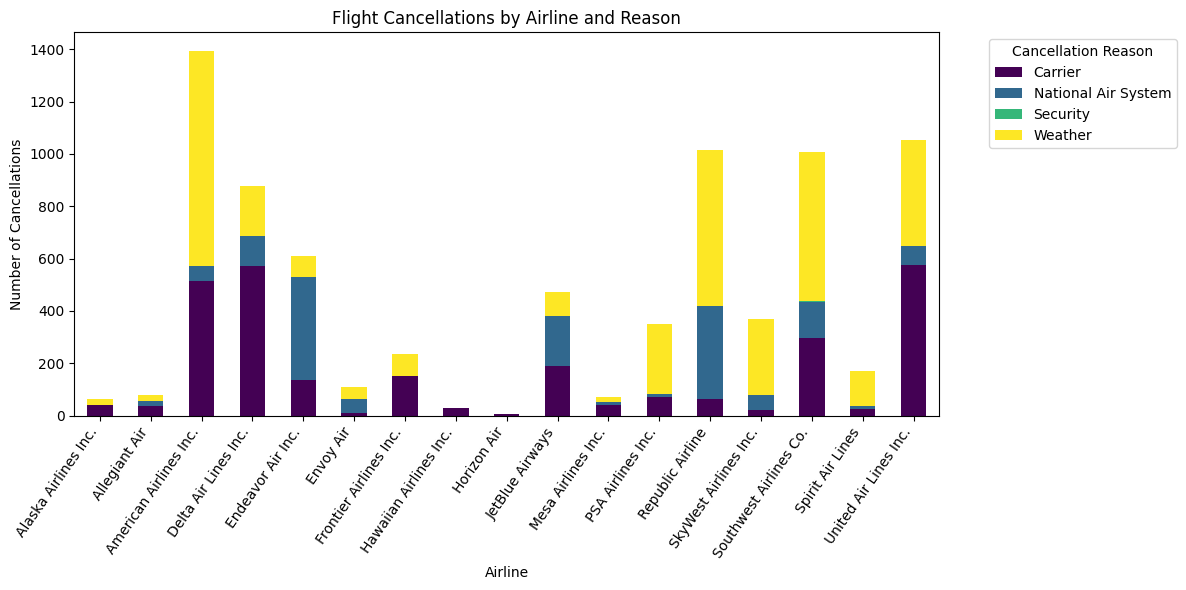

AIRLINE
Alaska Airlines Inc.        62
Allegiant Air               77
American Airlines Inc.    1395
Delta Air Lines Inc.       878
Endeavor Air Inc.          609
Envoy Air                  109
Frontier Airlines Inc.     236
Hawaiian Airlines Inc.      30
Horizon Air                  7
JetBlue Airways            474
Mesa Airlines Inc.          73
PSA Airlines Inc.          349
Republic Airline          1016
SkyWest Airlines Inc.      371
Southwest Airlines Co.    1008
Spirit Air Lines           170
United Air Lines Inc.     1053
dtype: int64


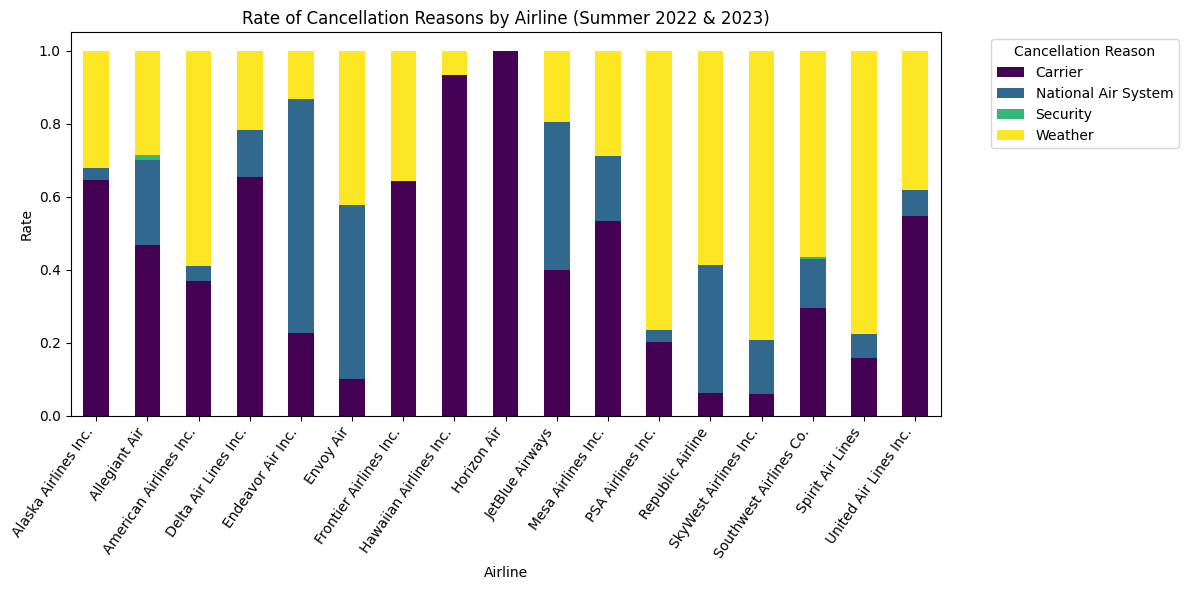

CANCELLATION_CODE,Carrier,National Air System,Security,Weather
AIRLINE,,,,
Alaska Airlines Inc.,0.645161,0.032258,0.000000,0.322581
Allegiant Air,0.467532,0.233766,0.012987,0.285714
American Airlines Inc.,0.368459,0.040143,0.000000,0.591398
Delta Air Lines Inc.,0.652620,0.130979,0.000000,0.216401
Endeavor Air Inc.,0.226601,0.640394,0.000000,0.133005


In [31]:
figsize = (12, 6)
rotation_angle = 55
colormap = 'viridis'
legend_bbox_to_anchor = (1.05, 1)
legend_loc = 'upper left'

fig, ax1 = plt.subplots(figsize=figsize)

airline_cancellations.plot(kind='bar',
                           stacked=True,
                           ax=ax1,
                           colormap=colormap,
                           title='Flight Cancellations by Airline and Reason')

ax1.set_xlabel('Airline')
ax1.set_ylabel('Number of Cancellations')
plt.xticks(rotation=rotation_angle, ha='right') 

ax1.legend(title='Cancellation Reason',
           bbox_to_anchor=legend_bbox_to_anchor, 
           loc=legend_loc)

plt.tight_layout() 
plt.show()

cancelled_flights_per_airline = df_cancelled.groupby(
    'AIRLINE').size()
print(cancelled_flights_per_airline)

cancellation_counts = df_cancelled.groupby(
    ['AIRLINE', 'CANCELLATION_CODE']).size().unstack(fill_value=0)
cancellation_counts['Total'] = cancellation_counts.sum(axis=1)
cancellation_rates = cancellation_counts.div(
    cancellation_counts['Total'], axis=0)
cancellation_rates.drop(columns='Total', inplace=True)

fig, ax2 = plt.subplots(figsize=figsize)

cancellation_rates.plot(kind='bar',
                        stacked=True,
                        ax=ax2,
                        colormap=colormap)

ax2.set_title('Rate of Cancellation Reasons by Airline (Summer 2022 & 2023)')
ax2.set_xlabel('Airline')
ax2.set_ylabel('Rate')

ax2.legend(title='Cancellation Reason',
           bbox_to_anchor=legend_bbox_to_anchor, 
           loc=legend_loc)

plt.xticks(rotation=rotation_angle, ha='right') 
plt.tight_layout()
plt.show()

cancellation_rates.head()

In [32]:
dest_cancellations = df_cancelled.groupby(
    ['DEST_STATE', 'CANCELLATION_CODE']).size().unstack(fill_value=0)
dest_cancellations

CANCELLATION_CODE,Carrier,National Air System,Security,Weather
DEST_STATE,,,,
AK,5,0,0,16
AL,6,5,0,16
AR,6,5,0,10
AZ,62,8,0,67
CA,301,22,1,194
CO,143,40,1,160
CT,13,4,0,10
DC,90,55,0,207
FL,231,107,0,334


In [33]:
or_cancellations = df_cancelled.groupby(
    ['ORIGIN_STATE', 'CANCELLATION_CODE']).size().unstack(fill_value=0)
or_cancellations

CANCELLATION_CODE,Carrier,National Air System,Security,Weather
ORIGIN_STATE,,,,
AK,2,0,0,16
AL,11,9,0,21
AR,2,5,0,8
AZ,70,5,0,62
CA,306,33,1,215
CO,135,27,0,147
CT,7,4,0,20
DC,111,59,0,201
FL,269,105,0,319


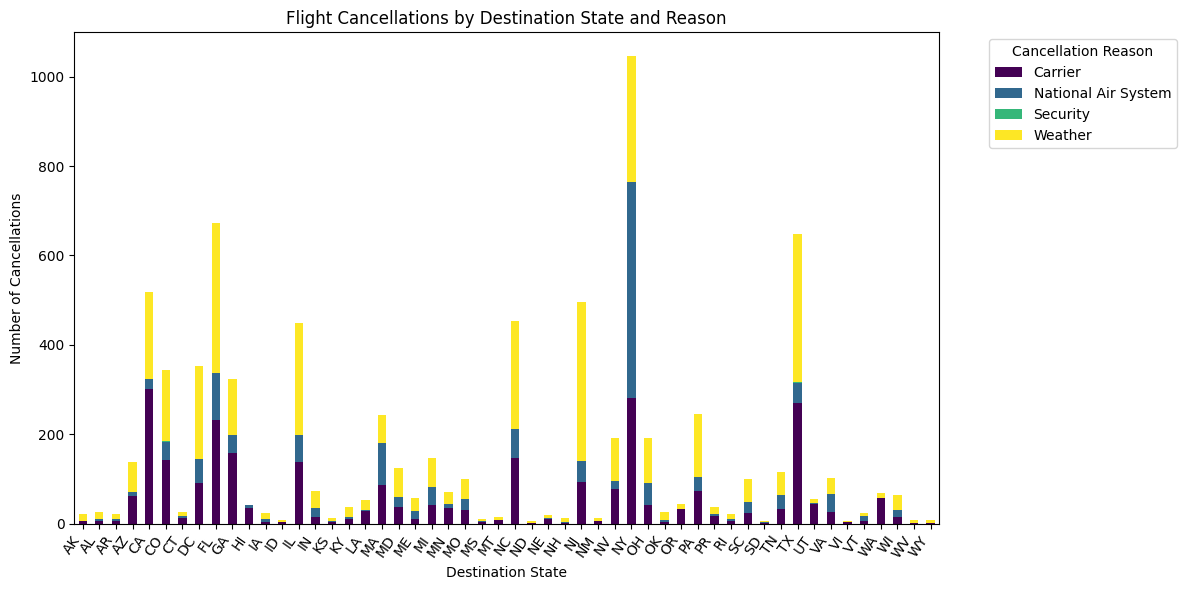

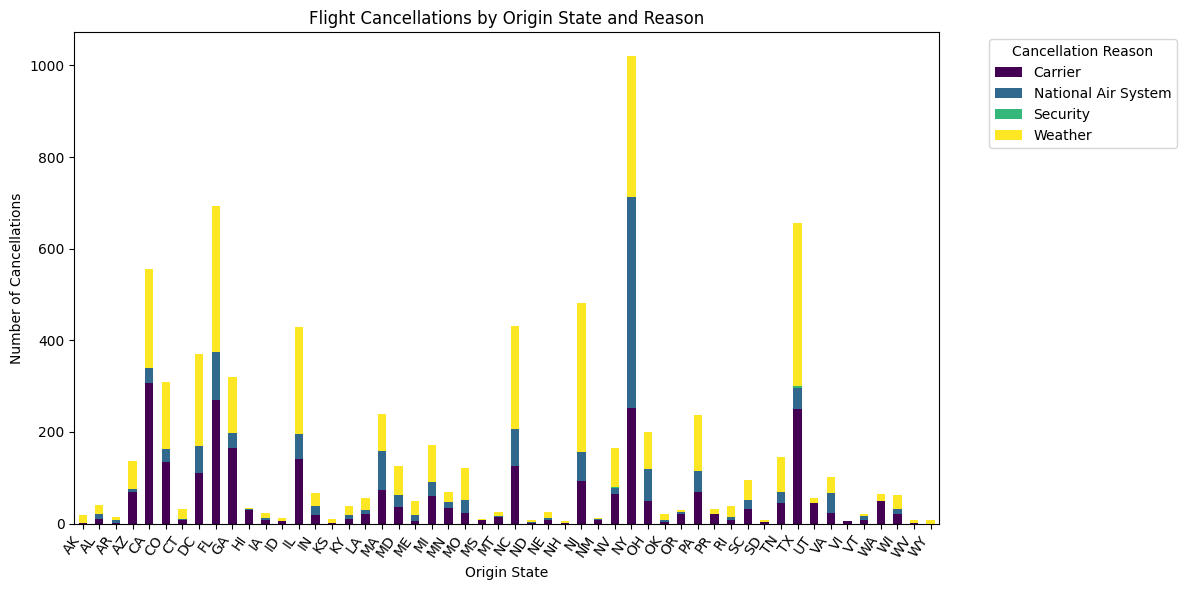

In [34]:
fig, ax3 = plt.subplots(figsize=figsize)

dest_cancellations.plot(kind='bar', 
                        stacked=True, 
                        ax=ax3, 
                        colormap=colormap,
                        title='Flight Cancellations by Destination State and Reason')

ax3.set_xlabel('Destination State')
ax3.set_ylabel('Number of Cancellations')
plt.xticks(rotation=rotation_angle, ha='right') 

ax3.legend(title='Cancellation Reason',
           bbox_to_anchor=legend_bbox_to_anchor, 
           loc=legend_loc)

plt.tight_layout()
plt.show()

fig, ax4 = plt.subplots(figsize=figsize)

or_cancellations.plot(kind='bar', 
                        stacked=True, 
                        ax=ax4, 
                        colormap=colormap,
                        title='Flight Cancellations by Origin State and Reason')

ax4.set_xlabel('Origin State')
ax4.set_ylabel('Number of Cancellations')
plt.xticks(rotation=rotation_angle, ha='right') 

ax4.legend(title='Cancellation Reason',
           bbox_to_anchor=legend_bbox_to_anchor, 
           loc=legend_loc)

plt.tight_layout()
plt.show()

In [35]:
cancelled_flights_per_origin = df_cancelled.groupby(
    'ORIGIN_STATE').size()

cancelled_flights_per_dest = df_cancelled.groupby(
    'DEST_STATE').size()

In [36]:
cancelled_flights_per_origin.sort_values()

ORIGIN_STATE
VI       5
NH       5
WY       8
WV       8
SD       9
ND       9
KS      10
MS      11
NM      12
ID      13
AR      15
AK      18
VT      22
OK      22
IA      24
MT      25
NE      26
OR      30
PR      31
CT      31
HI      35
RI      38
KY      38
AL      41
ME      49
LA      55
UT      57
WI      63
WA      64
IN      66
MN      70
SC      96
VA     101
MO     121
MD     125
AZ     137
TN     146
NV     164
MI     172
OH     199
PA     238
MA     240
CO     309
GA     321
DC     371
IL     429
NC     432
NJ     481
CA     555
TX     656
FL     693
NY    1021
dtype: int64

In [37]:
cancelled_flights_per_dest.sort_values()

DEST_STATE
VI       5
SD       5
ND       7
WV       8
WY       9
ID       9
MS      11
NM      12
NH      13
KS      13
MT      15
NE      19
AK      21
AR      21
RI      21
IA      23
VT      24
OK      26
AL      27
CT      27
PR      37
KY      38
HI      42
OR      44
LA      53
UT      55
ME      57
WI      63
WA      69
MN      70
IN      73
MO     100
SC     100
VA     103
TN     115
MD     125
AZ     137
MI     146
NV     192
OH     192
MA     243
PA     245
GA     324
CO     344
DC     352
IL     450
NC     453
NJ     495
CA     518
TX     647
FL     672
NY    1047
dtype: int64

In [38]:
df_cancelled.groupby(['ORIGIN_STATE', 'DEST_STATE']
                     ).size().sort_values(ascending=False)

ORIGIN_STATE  DEST_STATE
TX            TX            153
CA            CA            141
NY            FL            137
FL            NY            120
NY            NC            102
                           ... 
CO            ID              1
RI            GA              1
ID            OR              1
NC            AR              1
MN            NV              1
Length: 889, dtype: int64

In [39]:
df_cancelled.groupby(['ORIGIN_STATE', 'DEST_STATE']).size(
).sort_values(ascending=False).loc[lambda x: x > 50]

ORIGIN_STATE  DEST_STATE
TX            TX            153
CA            CA            141
NY            FL            137
FL            NY            120
NY            NC            102
              NY             89
NC            NY             88
FL            NJ             84
MA            NY             81
IL            NY             71
NY            IL             70
NJ            FL             68
TX            CA             64
CA            NV             63
DC            NY             63
OH            NY             62
FL            TX             62
NV            CA             61
CA            TX             58
FL            NC             55
NC            FL             54
TX            FL             52
NY            MA             52
GA            NY             51
dtype: int64

In [40]:
df_cancelled.groupby(['ORIGIN_STATE']).ORIGIN_STATE.value_counts().nlargest(5)

ORIGIN_STATE
NY    1021
FL     693
TX     656
CA     555
NJ     481
Name: count, dtype: int64

In [41]:
df_cancelled.groupby(['DEST_STATE']).DEST_STATE.value_counts().nlargest(5)

DEST_STATE
NY    1047
FL     672
TX     647
CA     518
NJ     495
Name: count, dtype: int64

Work in progress:
- time series analysis
- NY state specific analysis
- relationship between flight distance vs cancellation
- collecting insights